# Artificial Neural Network (ANN)

| Framework  | Creator                     | Governance / Stewardship          | First Released |
| ---------- | --------------------------- | --------------------------------- | -------------- |
| TensorFlow | Google Brain (Google)       | Google                            | Nov 2015       |
| PyTorch    | Facebook AI Research (Meta) | Now under PyTorch Foundation (LF) | \~2016         |
| MindSpore  | Huawei                      | Huawei                            | Mar 2020       |


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [ ]:
# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

X = pd.DataFrame(X, columns=iris.feature_names)
X["Target"] = y
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
X = X.drop(columns=["Target"])

# Spliting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [ ]:
X_train.shape

(120, 4)

In [ ]:
# in after when fit model after build structre and compile
# history = model.fit(X_train, y_train, epochs=25, batch_size=10, verbose=1, validation_split=0.2)

### another way to split

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# X_valid,X_test,y_valid,y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
# in after when fit model after build structre and compile
# history = model.fit(X_train, y_train, epochs=25, batch_size=10, verbose=1, validation_data=(X_valid,y_valid))

# Build Structure

In [ ]:
model = Sequential()
model.add(Dense(10, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 classes

C:\Users\20115\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 165 (660.00 B)

 Trainable params: 165 (660.00 B)

 Non-trainable params: 0 (0.00 B)

### **Notes**

In [ ]:
#model.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy'])


# !pip install adopt

# from adopt import ADOPT

# optimizer = ADOPT(model.parameters(), lr=1e-3)      # or  lr = 0.001
# model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

#model.compile(optimizer='adam', loss='mse', metrics=['accuracy']) ----> Regression Problem

# Optimizer

| **Optimizer** | **What it is**            | **Uses Gradient Descent?** | **When to Use / Notes**                                                                 |
| ------------- | ------------------------- | -------------------------- | --------------------------------------------------------------------------------------- |
| **SGD**       | Basic gradient descent    | ✅ Yes                      | Simple and fast, but needs careful tuning of learning rate and may be slow to converge. |
| **Adam**      | Adaptive + momentum-based | ✅ Yes                      | Great default choice; works well in most deep learning problems.                        |
| **Adamax**    | Stable variant of Adam    | ✅ Yes                      | Better for models with very large or sparse gradients.                                  |


| Type             | Batch Size             | Speed  | Stability  | Common in DL |
| ---------------- | ---------------------- | ------ | ---------- | ------------ |
| Batch            | All data               | ❌ Slow | ✅ Stable   | ❌ Rare       |
| Stochastic (SGD) | 1 sample               | ✅ Fast | ❌ Noisy    | ❌ Rare       |
| Mini-Batch       | Small chunk (e.g., 32) | ✅ Fast | ✅ Balanced | ✅ Yes!       |


#Loss

| Loss Function                     | Label Format             | Example (3 classes) |
| --------------------------------- | ------------------------ | ------------------- |
| `categorical_crossentropy`        | One-hot encoded          | `[0, 1, 0]`         |
| `sparse_categorical_crossentropy` | Integer-encoded (sparse) | `1`                 |


<img src="https://miro.medium.com/v2/resize:fit:774/0*vteMfTAGWsIZSaOW" style="width:1000px;height:800px" >

<img src="https://helpdeskgeek.com/wp-content/pictures/2023/09/how-to-calculate-mean-squared-error-mse-in-microsoft-excel-2-compressed.png" style="width:600px;height:400px" >

# True label: Class 2 → one-hot encoded: y=[0,1,0]
# Model prediction: y^=[0.2,0.7,0.1]

 # Apply the formula:
 ## Loss=−(0⋅log(0.2)+1⋅log(0.7)+0⋅log(0.1))=−log(0.7)
 ## Loss≈−(−0.3567)=0.3567

In [ ]:
history = model.fit(X_train, y_train, epochs=25, batch_size=10, verbose=1, validation_split=0.2)

Epoch 1/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9255 - loss: 0.7216 - val_accuracy: 0.9167 - val_loss: 0.7289
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8500 - loss: 0.7215 - val_accuracy: 0.9167 - val_loss: 0.7153
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8945 - loss: 0.7104 - val_accuracy: 0.9583 - val_loss: 0.7131
Epoch 4/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9155 - loss: 0.6938 - val_accuracy: 0.9167 - val_loss: 0.6987
Epoch 5/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9317 - loss: 0.6948 - val_accuracy: 0.9167 - val_loss: 0.6867
Epoch 6/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9153 - loss: 0.6800 - val_accuracy: 0.9167 - val_loss: 0.6652
Epoch 7/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8120 - loss: 0.6593 - val_accuracy: 0.9167 - val_loss: 0.6654
Epoch 8/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9239 - loss: 0.6447 - val_accuracy: 0.9167 - v

# Evalution

In [ ]:
print(model.evaluate(X_train, y_train))
print(model.evaluate(X_test, y_test))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9721 - loss: 0.4764
[0.4979300796985626, 0.9666666388511658]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8667 - loss: 0.4997
[0.4996970295906067, 0.8666666746139526]


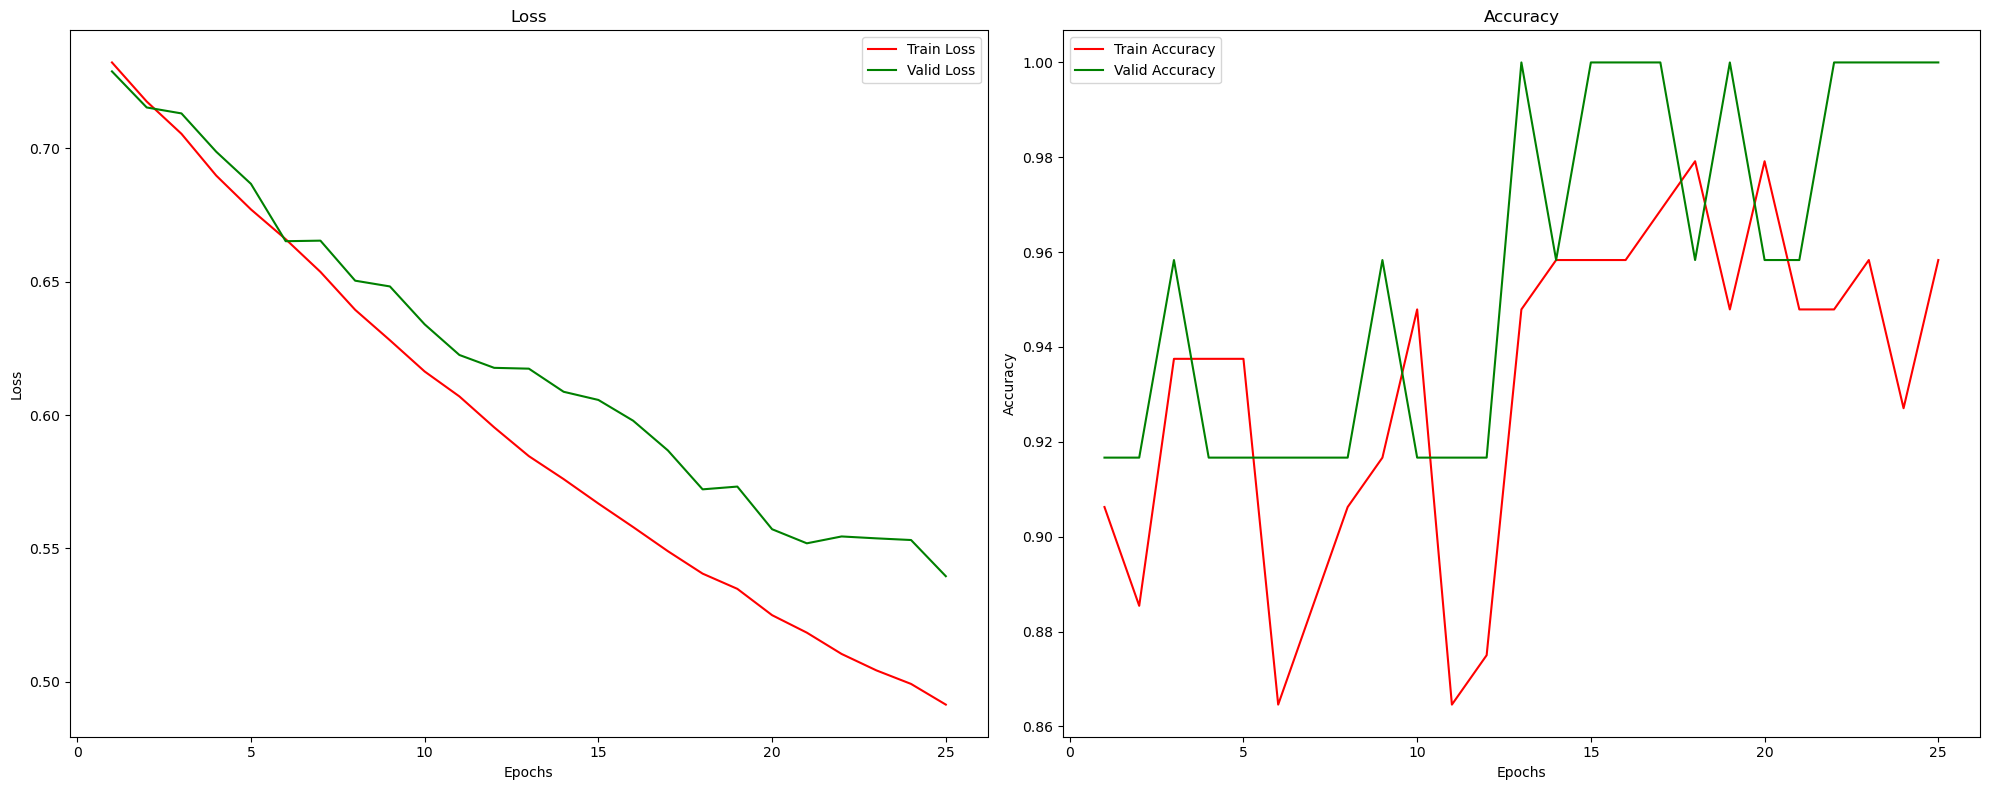

In [ ]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = [i+1 for i in range(len(tr_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
[[0.0661601  0.4777167  0.45612323]
 [0.86154544 0.11578818 0.02266632]
 [0.0031929  0.30566832 0.6911388 ]
 [0.07828774 0.49563104 0.4260812 ]
 [0.06025696 0.48731884 0.4524242 ]
 [0.8377199  0.13410366 0.02817643]
 [0.19737628 0.5000841  0.30253956]
 [0.03913696 0.48996395 0.47089902]
 [0.04465835 0.46642485 0.48891675]
 [0.13612027 0.5028601  0.36101958]
 [0.04554331 0.48484293 0.46961373]
 [0.81507146 0.1488787  0.03604986]
 [0.88334316 0.09849737 0.01815943]
 [0.81309384 0.15042168 0.03648447]
 [0.8773387  0.10298074 0.01968057]
 [0.08754164 0.506223   0.40623534]
 [0.01551041 0.41005665 0.57443297]
 [0.11826101 0.49541065 0.38632843]
 [0.07492414 0.48340988 0.44166595]
 [0.01618395 0.41308835 0.5707277 ]
 [0.79892784 0.16073394 0.04033827]
 [0.0492764  0.47920898 0.47151458]
 [0.8161776  0.14958838 0.03423406]
 [0.01687826 0.41302598 0.5700958 ]
 [0.02107359 0.4410139  0.5379125 ]
 [0.03109434 0.47086436 0.49804133]
 [0.01197307 0.3802668  0

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_labels = np.argmax(y_pred, axis=1)
print(y_pred_labels)
print(accuracy_score(y_test, y_pred_labels))


[1 0 2 1 1 0 1 1 2 1 1 0 0 0 0 1 2 1 1 2 0 1 0 2 2 2 2 2 0 0]
0.8666666666666667


<Axes: >

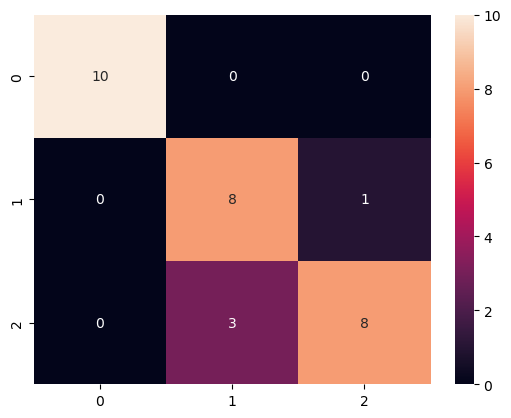

In [ ]:
con = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(con, annot=True)

# Save a model

In [ ]:
model.save('model.h5')

| Format     | Save Command             | File/Folder       | Use Case                         |
| ---------- | ------------------------ | ----------------- | -------------------------------- |
| .h5      | model.save("model.h5") | Single file       | Simpler saving, widely supported |
| SavedModel | model.save("my_model") | Folder with files | TensorFlow-native deployment     |


# Using Model

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("model.h5")


In [ ]:
sample = [[5.1, 3.5, 1.4, 0.2]]
pred = model.predict(np.array(sample))
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
[[0.86707705 0.11069414 0.02222887]]
